### Get Dataset 

In [1]:
from utility import get_race,calculate_order,get_bet_result,a_start_search_for_optimization,get_estimates,get_accuracy,show_results
import numpy as np
import pandas as pd

In [2]:
data_frames = get_race('29/05/2022')
num_of_competitions = len(data_frames)
print('Günlük yarışma sayısı: {}'.format(num_of_competitions))

Günlük yarışma sayısı: 9


In [3]:
max_num_of_contestant = 0
for data_frame in data_frames:
    num_of_contestant, _ = data_frame.shape
    if max_num_of_contestant < num_of_contestant:
        max_num_of_contestant = num_of_contestant

print('Yarışmalar arasında maksimum yarışması sayısı: {}'.format(max_num_of_contestant))

Yarışmalar arasında maksimum yarışması sayısı: 15


### Prepare matrix of horse whose degree listed

In [4]:
pre_horse_orders = np.zeros((num_of_competitions, max_num_of_contestant))
pre_horse_result = np.zeros((num_of_competitions, max_num_of_contestant))

In [5]:
for i in range(num_of_competitions):
    
    data_frame = data_frames[i]
    num_of_contestant, _ = data_frame.shape
    bet_result = get_bet_result(data_frame)
    bet_len = len(bet_result)
    for j in range(bet_len):
        pre_horse_result[i][j] = bet_result[j]
        
    for j in range(num_of_contestant):
        pre_horse_orders[i][j] = calculate_order(data_frame['Son 6 Y.'][j])

### Estimate bets in horce riding competitions

In [6]:
upper_min_cost_contestants =  np.array([upper_ones for upper_ones in pre_horse_orders[num_of_competitions - 1]])
# select first smallest 3 values
idxs = np.argpartition(upper_min_cost_contestants, 3)

In [7]:

accuracies = pd.DataFrame()
for i in range(3):
    start_point = []
    start_point.append(idxs[i])
    start_point.append(num_of_competitions - 1)
    start_point.append(pre_horse_orders[num_of_competitions - 1][idxs[i]])
    accuracy_results = []
    for lmt in range(3,8,1):
        iterations, possible_race_results = a_start_search_for_optimization(pre_horse_orders,start_point,'down',lmt)

        get_estimates(start_point[0],start_point[1],possible_race_results,pre_horse_result,lmt)

        possible_race_results.append(start_point)
        accuracy = get_accuracy(num_of_competitions * max_num_of_contestant, possible_race_results, pre_horse_result)
        accuracy_results.append(accuracy)
        
    accuracies['{}. competition ,{}. contestant'.format(start_point[0],start_point[1])] = accuracy_results 

Estimated bet from starting from 11. contestant in 8. competition  with order limit 3
No estimates found
Estimated bet from starting from 11. contestant in 8. competition  with order limit 4
No estimates found
Estimated bet from starting from 11. contestant in 8. competition  with order limit 5
In 7 run , 10 number horse finished  at 1. order
In 6 run , 9 number horse finished  at 4. order
In 6 run , 11 number horse finished  at 13. order
In 5 run , 8 number horse finished  at 7. order
In 5 run , 9 number horse finished  at 9. order
In 5 run , 10 number horse finished  at 10. order
In 5 run , 11 number horse finished  at 6. order
In 5 run , 12 number horse finished  at 0. order
In 4 run , 13 number horse finished  at 2. order
In 4 run , 10 number horse finished  at 9. order
In 3 run , 10 number horse finished  at 6. order
In 3 run , 11 number horse finished  at 0. order
In 4 run , 7 number horse finished  at 7. order
In 3 run , 6 number horse finished  at 5. order
In 3 run , 7 number h

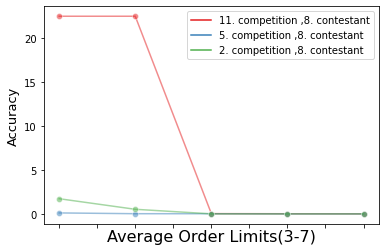

In [8]:
show_results(accuracies,0)

### Other estimates for 22/05/2022 and 15/05/2022 dates 

In [9]:
data_frames = get_race('22/05/2022')
num_of_competitions = len(data_frames)
print('Günlük yarışma sayısı: {}'.format(num_of_competitions))

max_num_of_contestant = 0
for data_frame in data_frames:
    num_of_contestant, _ = data_frame.shape
    if max_num_of_contestant < num_of_contestant:
        max_num_of_contestant = num_of_contestant
        
print('Yarışmalar arasında maksimum yarışması sayısı: {}'.format(max_num_of_contestant))

pre_horse_orders = np.zeros((num_of_competitions, max_num_of_contestant))
pre_horse_result = np.zeros((num_of_competitions, max_num_of_contestant))

for i in range(num_of_competitions):
    
    data_frame = data_frames[i]
    num_of_contestant, _ = data_frame.shape
    bet_result = get_bet_result(data_frame)
    bet_len = len(bet_result)
    for j in range(bet_len):
        pre_horse_result[i][j] = bet_result[j]
        
    for j in range(num_of_contestant):
        pre_horse_orders[i][j] = calculate_order(data_frame['Son 6 Y.'][j])
        
upper_min_cost_contestants =  np.array([upper_ones for upper_ones in pre_horse_orders[num_of_competitions - 1]])
# select first smallest 3 values
idxs = np.argpartition(upper_min_cost_contestants, 3)

accuracies = pd.DataFrame()
for i in range(3):
    start_point = []
    start_point.append(idxs[i])
    start_point.append(num_of_competitions - 1)
    start_point.append(pre_horse_orders[num_of_competitions - 1][idxs[i]])
    accuracy_results = []
    for lmt in range(3,8,1):
        iterations, possible_race_results = a_start_search_for_optimization(pre_horse_orders,start_point,'down',lmt)

        get_estimates(start_point[0],start_point[1],possible_race_results,pre_horse_result,lmt)

        possible_race_results.append(start_point)
        accuracy = get_accuracy(num_of_competitions * max_num_of_contestant, possible_race_results, pre_horse_result)
        accuracy_results.append(accuracy)
        
    accuracies['{}. competition ,{}. contestant'.format(start_point[0],start_point[1])] = accuracy_results 

Günlük yarışma sayısı: 9
Yarışmalar arasında maksimum yarışması sayısı: 11
Estimated bet from starting from 7. contestant in 8. competition  with order limit 3
In 7 run , 6 number horse finished  at 9. order
In 7 run , 8 number horse finished  at 6. order
Estimated bet from starting from 7. contestant in 8. competition  with order limit 4
In 7 run , 6 number horse finished  at 9. order
In 7 run , 8 number horse finished  at 6. order
Estimated bet from starting from 7. contestant in 8. competition  with order limit 5
In 7 run , 6 number horse finished  at 9. order
In 7 run , 7 number horse finished  at 7. order
In 7 run , 8 number horse finished  at 6. order
Estimated bet from starting from 7. contestant in 8. competition  with order limit 6
In 7 run , 6 number horse finished  at 9. order
In 7 run , 7 number horse finished  at 7. order
In 7 run , 8 number horse finished  at 6. order
Estimated bet from starting from 7. contestant in 8. competition  with order limit 7
In 7 run , 6 number 

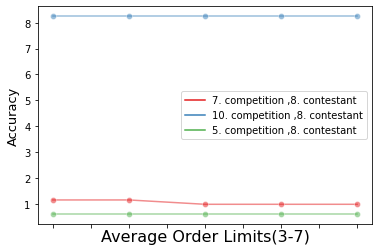

In [10]:
show_results(accuracies,1)